<a href="https://colab.research.google.com/github/bongkyunSON/Quant_Factor/blob/main/%EC%8B%9C%EC%9E%A5%EA%B5%AD%EB%A9%B4%EB%B6%84%EC%84%9D%EA%B3%BC_%EC%A3%BC%EC%8B%9D_%EB%B2%A0%ED%83%80_%EC%A0%84%EB%9E%B5_221230.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 패키지 설치
!pip install pickle5 --quiet

     |████████████████████████████████| 132 kB 4.0 MB/s 


In [2]:
# 패키지 임포트
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle5 as pickle
sns.set()

In [3]:
# 데이터 로드
with open('oecd_cli.pkl', 'rb') as f:
    oecd_cli_df = pickle.load(f)

with open('spx_price.pkl', 'rb') as f:
    spx_df = pickle.load(f)

In [4]:
oecd_cli_df.index = pd.to_datetime(oecd_cli_df.index)
spx_df.index = pd.to_datetime(spx_df.index)

In [5]:
# 선견편향 제거
oecd_cli_df = oecd_cli_df.shift(1)

# 시점별 국가 수 계산
noc = len(oecd_cli_df.columns) - oecd_cli_df.diff().isna().sum(axis=1)

# 확산 지수
diffusion_index = (oecd_cli_df.diff() > 0).sum(axis=1) / noc

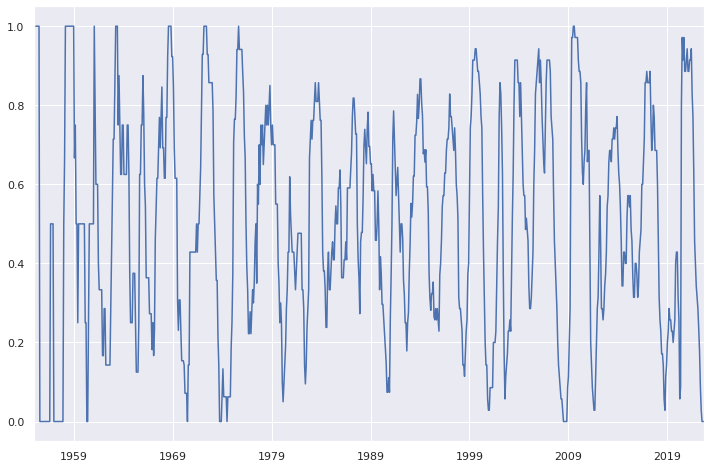

In [6]:
# 확산 지수 그래프
diffusion_index.plot(figsize=(12, 8))

In [7]:
# 트레이딩 시그널
spx_signal = diffusion_index
spx_signal.index = pd.to_datetime(spx_signal.index)

In [8]:
# 백테스팅
df = pd.concat([spx_signal, spx_df, diffusion_index], axis=1, join='inner')
df.columns = ['spx_signal', 'spx', 'index']
df['spx_rets'] = df['spx'].pct_change().fillna(0)
df['spx_port_rets'] = df['spx_rets'] * df['spx_signal'].shift() - abs(df['spx_signal'].diff()) * 0.0002

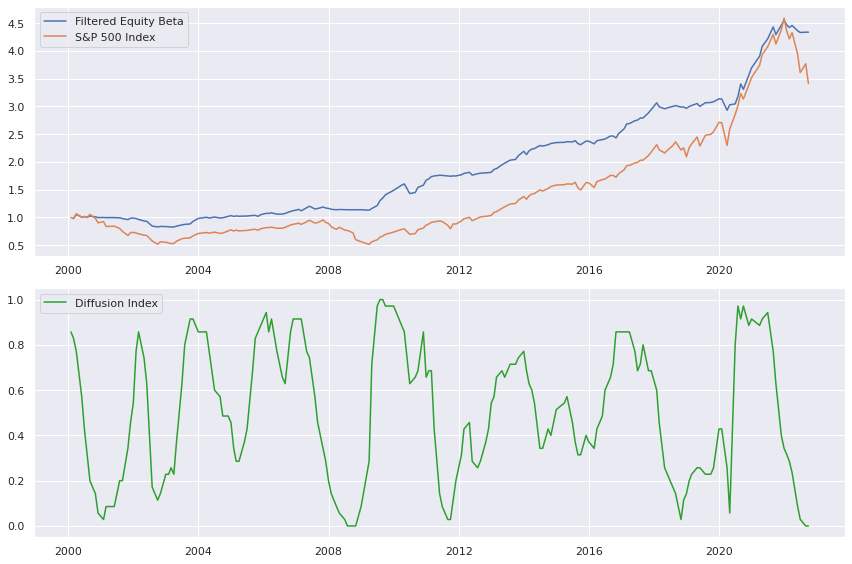

In [9]:
# 시각화
plt.figure(figsize=(12, 8))

# 지수 및 트레이딩 전략
ax1 = plt.subplot(211)
ax1.plot((1 + df['spx_port_rets'].loc['2000':]).cumprod(), label='Filtered Equity Beta')
ax1.plot((1 + df['spx_rets'].loc['2000':]).cumprod(), label='S&P 500 Index')
plt.legend()

# 확산 지수
ax2 = plt.subplot(212)
ax2.plot(df['index'].loc['2000':], label='Diffusion Index', color='tab:green')
plt.legend()
plt.tight_layout()
plt.show()